In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

column_names = ['Area','Perimeter','Compactness','Length of Kernel','Width of Kernel','Asymmetry Coefficient','Length of Kernel Groove','Type of Wheat']

df = pd.read_csv('seeds_dataset.txt',sep='\t',names=column_names,header=None)
df.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type of Wheat
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [126]:
label = df['Type of Wheat']
attributes = df.drop(['Type of Wheat'],axis=1)

1. Use t-sne to visualize the data, and show the scatter plots of first two principal components,
and of two arbitrarily selected features.

In [145]:
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score

tsne = TSNE(n_components=2,init='pca',random_state=123)
a = tsne.fit_transform(attributes)

/Users/richardmorales/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/richardmorales/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


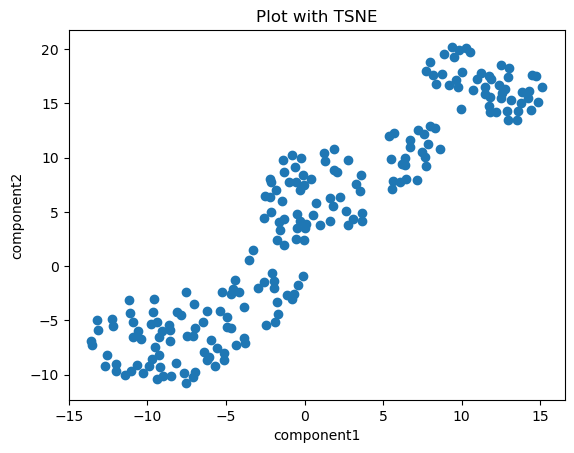

In [43]:
plt.scatter(a[:,0],a[:,1])
plt.xlabel('component1')
plt.ylabel('component2')
plt.title('Plot with TSNE')
plt.show()

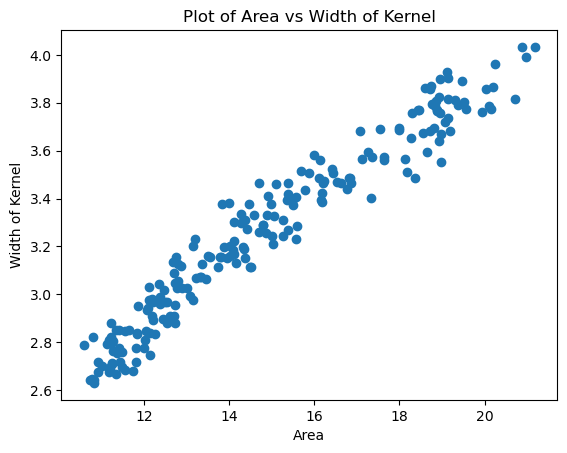

In [41]:
plt.scatter(attributes['Area'].values,attributes['Width of Kernel'].values)
plt.xlabel('Area')
plt.ylabel('Width of Kernel')
plt.title('Plot of Area vs Width of Kernel')
plt.show()

Cluster the data using K-means, hierarchical clustering, and DBSCAN, and evaluate the per-
formance of each clustering algorithm with adjusted rand index using the adjusted rand score
module in sklearn.

In [57]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(a)

In [69]:
label1_points = a[y_km ==0]
label2_points = a[y_km==1]
label3_points = a[y_km==2]

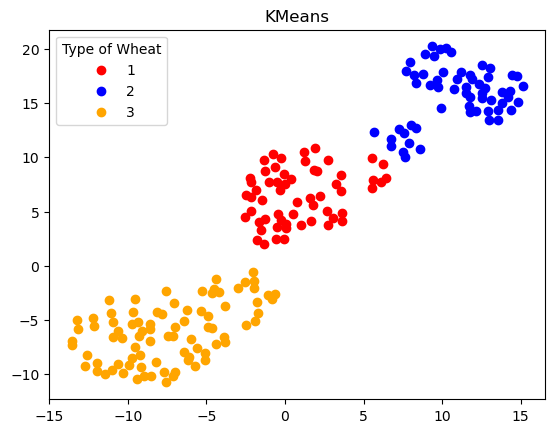

In [111]:
plt.scatter(label1_points[:,0],label1_points[:,1], color='red',label = '1')
plt.scatter(label2_points[:,0],label2_points[:,1],color='blue',label='2')
plt.scatter(label3_points[:,0],label3_points[:,1],color='orange',label='3')
plt.legend(title='Type of Wheat')
plt.title('KMeans')
plt.show()

In [119]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
h_labels = ac.fit_predict(a)

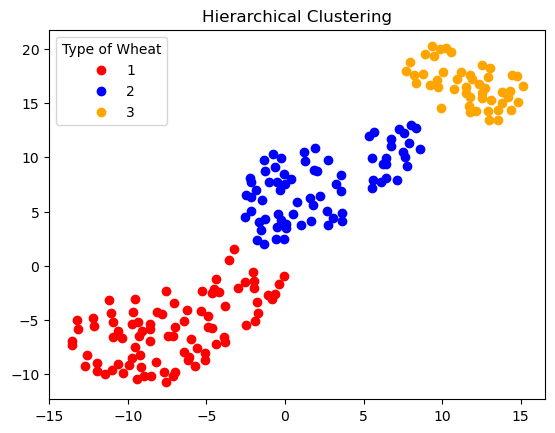

In [120]:
label1_points = a[h_labels==0]
label2_points = a[h_labels==1]
label3_points = a[h_labels==2]
plt.scatter(label1_points[:,0],label1_points[:,1], color='red',label = '1')
plt.scatter(label2_points[:,0],label2_points[:,1],color='blue',label='2')
plt.scatter(label3_points[:,0],label3_points[:,1],color='orange',label='3')
plt.legend(title='Type of Wheat')
plt.title('Hierarchical Clustering')
plt.show()

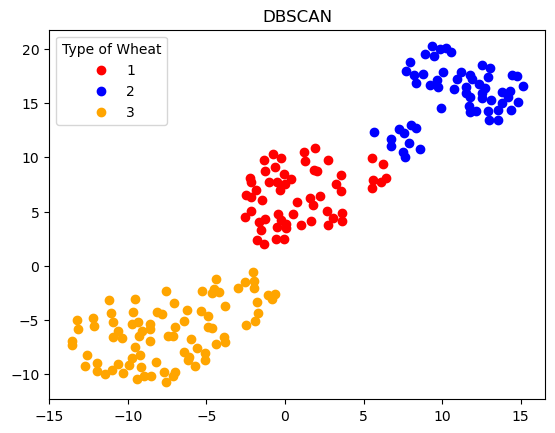

In [117]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=5,min_samples=50,metric='euclidean')
db_labels = db.fit_predict(a)
label1_points = a[db_labels ==0]
label2_points = a[db_labels==1]
label3_points = a[db_labels==2]
plt.scatter(label1_points[:,0],label1_points[:,1], color='red',label = '1')
plt.scatter(label2_points[:,0],label2_points[:,1],color='blue',label='2')
plt.scatter(label3_points[:,0],label3_points[:,1],color='orange',label='3')
plt.legend(title='Type of Wheat')
plt.title('DBSCAN')
plt.show()

In [149]:
from sklearn.metrics import adjusted_rand_score

kmeans_score = adjusted_rand_score(label,y_km)
hiear_score = adjusted_rand_score(label,h_labels)
db_score = adjusted_rand_score(label,db_labels)
print(f'Kmeans score = {kmeans_score}')
print(f'Hierachical score = {hiear_score}')
print(f'DB score = {db_score}')

Kmeans score = 0.6998380308953246
Hierachical score = 0.5535325183735273
DB score = 0.6708145479706317


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(attributes, label, test_size=0.3, random_state=1,stratify=label)

#standardize data
sc = StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#logistic regression with the original data
lr = LogisticRegression(multi_class='ovr',random_state=1,solver='lbfgs')
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)


acc=accuracy_score(y_test, y_pred)
print(f"acc={acc:.3f}")

acc=0.968


In [132]:
X_train, X_test, y_train, y_test = train_test_split(a, label, test_size=0.3, random_state=1,stratify=label)
#logistic regression with 2 principal components
lr = LogisticRegression(multi_class='ovr',random_state=1,solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

acc=accuracy_score(y_test, y_pred)
print(f"acc={acc:.3f}")

acc=0.905


In [142]:
random_features = attributes[['Area','Perimeter']]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(random_features, label, test_size=0.3, random_state=1,stratify=label)
#logistic regression with 2 principal components
lr = LogisticRegression(multi_class='ovr',random_state=1,solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

acc=accuracy_score(y_test, y_pred)
print(f"acc={acc:.3f}")

acc=0.857


Of the three logistic regression models, the logistic regression model that contained all the features resulted in the highest accuracy with 96.8%. The second best was the logistic regression model with the 2 principal components with an accuracy of 90.5%. The logistic regression with two random features of Area and Perimeter resulted in 85.7% accuracy. 